In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.4 MB/s eta 0:00:00


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CTSD DATA/DailyDelhiClimateTrain.csv")

In [ ]:
df.shape

(1462, 5)

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1457    False
1458    False
1459    False
1460    False
1461    False
Length: 1462, dtype: bool

In [ ]:
df.isna().any()

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool

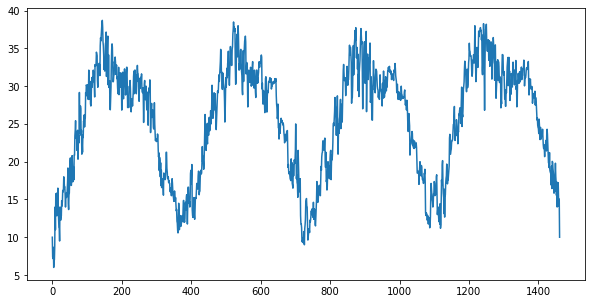

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
df['meantemp'].plot(ax=ax)
plt.show()

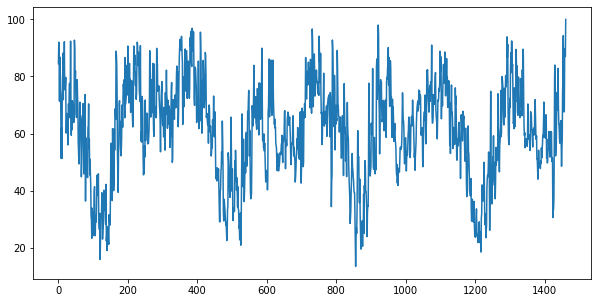

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['humidity'].plot(ax=ax)
plt.show()

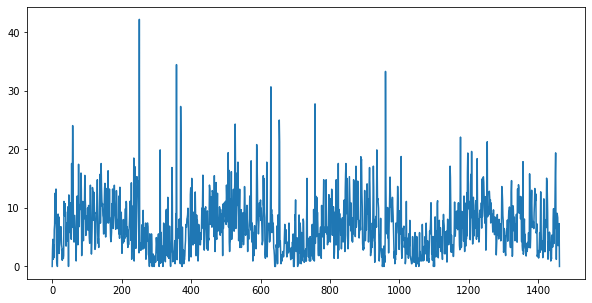

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['wind_speed'].plot(ax=ax)
plt.show()

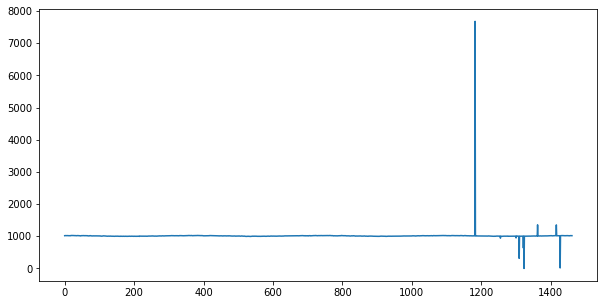

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['meanpressure'].plot(ax=ax)
plt.show()

In [ ]:
df_test = df.iloc[len(df)-365:]
df_train = df.iloc[: len(df)-365]

In [ ]:
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1092,2015-12-29,16.375000,65.000000,7.412500,1018.125000
1093,2015-12-30,15.500000,71.750000,2.100000,1017.500000
1094,2015-12-31,15.000000,71.375000,2.087500,1020.500000
1095,2016-01-01,14.714286,72.285714,1.057143,1021.142857


In [ ]:
train_size = 1097

In [ ]:
univariate_df = df[['date', 'meantemp']].copy()
univariate_df.columns = ['ds', 'y']

In [ ]:
train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

In [ ]:
model = pm.auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4243.364, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4212.919, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4202.912, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4241.369, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4166.532, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4168.532, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4168.532, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4185.344, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4203.187, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4168.432, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4164.573, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4200.925, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4210.928, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4166.572, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
model = ARIMA(y_train, order=(2,0,0),trend='c')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1097
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2102.762
Date:                Sat, 25 Mar 2023   AIC                           4213.525
Time:                        12:19:14   BIC                           4233.526
Sample:                             0   HQIC                          4221.092
                               - 1097                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6762      2.284     10.367      0.000      19.200      28.152
ar.L1          0.8202      0.024     34.641      0.000       0.774       0.867
ar.L2          0.1606      0.024      6.776      0.0

In [ ]:
y_pred = model_fit.forecast(365)


score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))
print("Mean Val of df_test:", univariate_df['y'].mean())

RMSE: 7.753505554589535
Mean Val of df_test: 25.495520655761762


In [ ]:
y_pred

1097    14.301051
1098    14.433265
1099    14.590044
1100    14.739859
1101    14.887907
          ...    
1457    23.653117
1458    23.653499
1459    23.653874
1460    23.654244
1461    23.654607
Name: predicted_mean, Length: 365, dtype: float64

In [ ]:
df_train["y"] = df_train["meantemp"]
df_train["ds"] = df_train["date"]
df_test["y"] = df_test["meantemp"]
df_test["ds"] = df_test["date"]
df_train = df_train.drop(["meantemp", "date"], 1)
df_test = df_test.drop(["meantemp", "date"], 1)

<ipython-input-24-d59b76845087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["y"] = df_train["meantemp"]
<ipython-input-24-d59b76845087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["ds"] = df_train["date"]
<ipython-input-24-d59b76845087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
!pip install pystan
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 3.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Prophet() 
model.fit(df_train) 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4bwrbk2/tvv1rk_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4bwrbk2/yc190o8l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40185', 'data', 'file=/tmp/tmpz4bwrbk2/tvv1rk_o.json', 'init=/tmp/tmpz4bwrbk2/yc190o8l.json', 'output', 'file=/tmp/tmpz4bwrbk2/prophet_model3zm7i_l7/prophet_model-20230325121944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = model.make_future_dataframe(periods=365, freq = 'D')

In [ ]:
forecast_data = model.predict(future_data)

In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,11.491475,8.849889,13.898550
1,2013-01-02,11.609242,9.002110,14.059680
2,2013-01-03,11.485315,8.685957,14.256682
3,2013-01-04,11.459843,8.954318,13.917453
4,2013-01-05,11.463823,9.096636,14.021508


In [ ]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1457,2016-12-28,12.535269,9.889536,15.297130
1458,2016-12-29,12.299528,9.783226,14.943190
1459,2016-12-30,12.169944,9.567123,14.789605
1460,2016-12-31,12.078433,9.615657,14.672782
1461,2017-01-01,11.952697,9.376448,14.388536


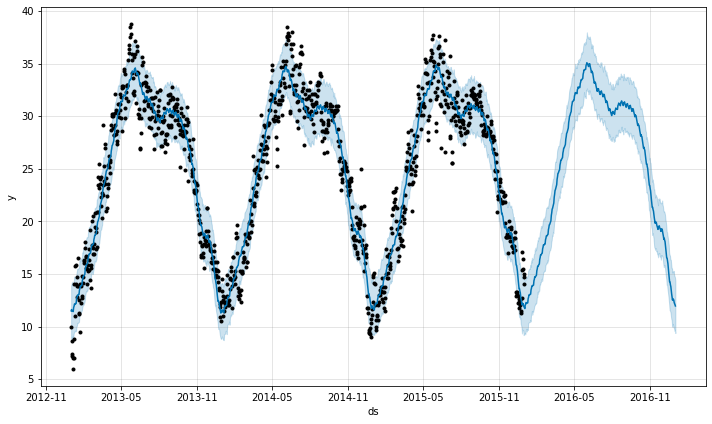

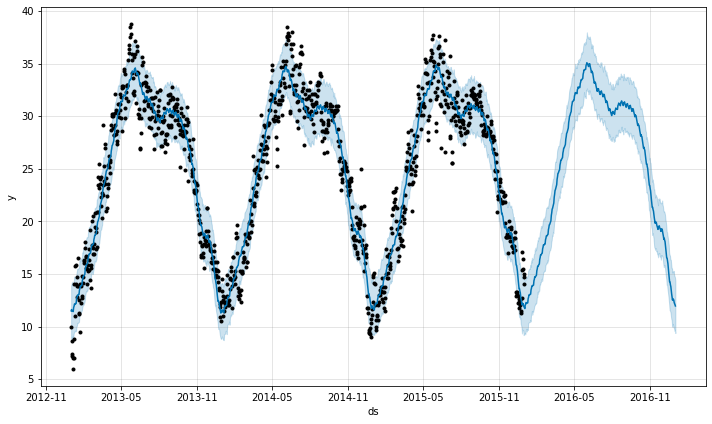

In [ ]:
model.plot(forecast_data)

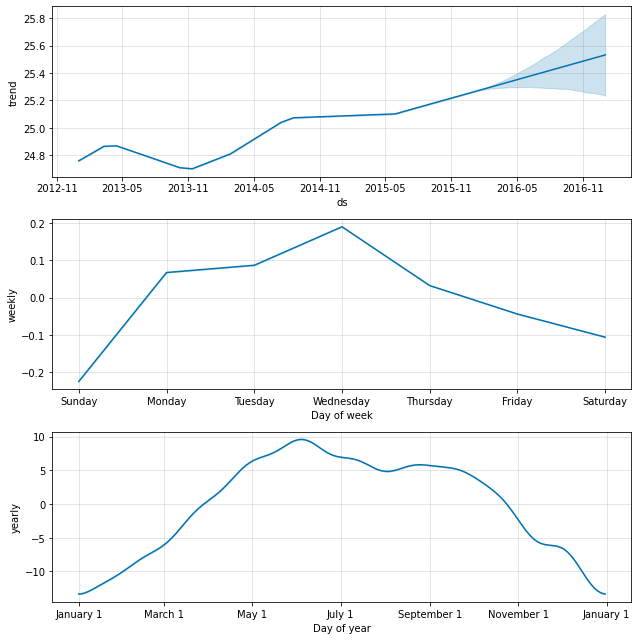

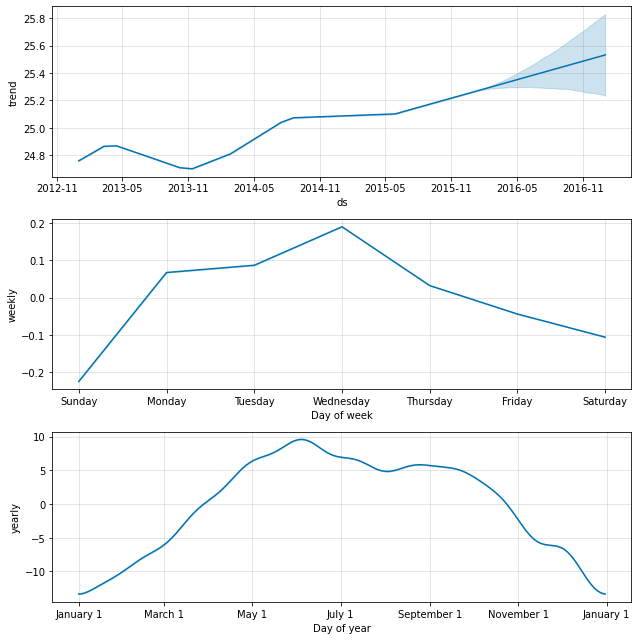

In [ ]:
model.plot_components(forecast_data)

In [ ]:
predictions = forecast_data.iloc[-365:]['yhat']

In [ ]:
predictions

1097    11.703380
1098    12.032719
1099    12.106170
1100    12.278061
1101    12.201828
          ...    
1457    12.535269
1458    12.299528
1459    12.169944
1460    12.078433
1461    11.952697
Name: yhat, Length: 365, dtype: float64

In [ ]:
df_test['y']

1097    14.375000
1098    15.750000
1099    15.833333
1100    17.375000
1101    17.125000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: y, Length: 365, dtype: float64

In [ ]:
ensemble_predictions = np.mean([predictions, y_pred], axis=0)

In [ ]:
ensemble_predictions

array([13.00221557, 13.23299199, 13.34810707, 13.50895975, 13.54486708,
       13.62546374, 13.71637705, 13.78124594, 14.05294056, 14.18913499,
       14.36738622, 14.41492317, 14.50238665, 14.59599333, 14.66010007,
       14.92830585, 15.05901562, 15.23049366, 15.27063174, 15.35067008,
       15.43734533, 15.49544207, 15.7588857 , 15.88630089, 16.05606347,
       16.09607091, 16.17746921, 16.26681024, 16.32861542, 16.59648347,
       16.72866546, 16.90313478, 16.94737641, 17.03213261, 17.12357846,
       17.18590261, 17.45243025, 17.58121114, 17.75009986, 17.7865522 ,
       17.8613748 , 17.94090106, 17.98956905, 18.241038  , 18.35376693,
       18.50608257, 18.525961  , 18.58476056, 18.64937973, 18.684816  ,
       18.92526333, 19.02967203, 19.17679908, 19.19497375, 19.25581676,
       19.3263869 , 19.37173189, 19.62598102, 19.74790382, 19.9159628 ,
       19.95808502, 20.04539069, 20.14435251, 20.21936189, 20.5038396 ,
       20.65581415, 20.85299555, 20.92256867, 21.03494354, 21.15

In [ ]:
print("RMSE b/w Actual & Predicted vals: ",rmse(ensemble_predictions,df_test['y']))
print("Mean Val of df_test:", df_test['y'].mean())

RMSE b/w Actual & Predicted vals:  4.692347934250088
Mean Val of df_test: 27.12635682330706


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/CTSD DATA/DailyDelhiClimateTrain.csv", index_col='date',parse_dates=True)

In [ ]:
df1

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
df1 = df1.drop(["humidity", "wind_speed","meanpressure"], 1)

<ipython-input-43-3b89961ec624>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop(["humidity", "wind_speed","meanpressure"], 1)


In [ ]:
df1

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:
df_test1 = df1.iloc[len(df1)-365:]
df_train1 = df1.iloc[: len(df1)-365]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df_train1)
scaled_train = scaler.transform(df_train1)
scaled_test = scaler.transform(df_test1)

In [ ]:
scaled_train[:10]

array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       [0.08151383],
       [0.        ],
       [0.03056769],
       [0.03056769],
       [0.08733624],
       [0.24454148],
       [0.15283843]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 365
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=20)

Epoch 1/20
732/732 [==============================] - 71s 96ms/step - loss: 0.0076
Epoch 2/20
732/732 [==============================] - 68s 94ms/step - loss: 0.0049
Epoch 3/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0040
Epoch 4/20
732/732 [==============================] - 56s 77ms/step - loss: 0.0038
Epoch 5/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0034
Epoch 6/20
732/732 [==============================] - 56s 76ms/step - loss: 0.0031
Epoch 7/20
732/732 [==============================] - 55s 75ms/step - loss: 0.0031
Epoch 8/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0028
Epoch 9/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0029
Epoch 10/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0028
Epoch 11/20
732/732 [==============================] - 54s 74ms/step - loss: 0.0030
Epoch 12/20
732/732 [==============================] - 55s 75ms/step - loss: 0.0027
E

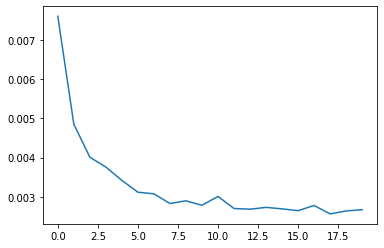

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-365:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 255ms/step


array([[0.26761612]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.25600437])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(df_test1)):
    
   
    current_pred = model.predict(current_batch)[0]
    
   
    test_predictions.append(current_pred) 
    
  
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


In [ ]:
test_predictions


[array([0.26761612], dtype=float32),
 array([0.28641897], dtype=float32),
 array([0.30179378], dtype=float32),
 array([0.3152745], dtype=float32),
 array([0.32778728], dtype=float32),
 array([0.33997875], dtype=float32),
 array([0.35207617], dtype=float32),
 array([0.36418587], dtype=float32),
 array([0.3764797], dtype=float32),
 array([0.38914272], dtype=float32),
 array([0.40234044], dtype=float32),
 array([0.41618964], dtype=float32),
 array([0.4307663], dtype=float32),
 array([0.44609776], dtype=float32),
 array([0.46219835], dtype=float32),
 array([0.47907487], dtype=float32),
 array([0.49672857], dtype=float32),
 array([0.51515603], dtype=float32),
 array([0.53376186], dtype=float32),
 array([0.55211985], dtype=float32),
 array([0.5699642], dtype=float32),
 array([0.58730555], dtype=float32),
 array([0.6041698], dtype=float32),
 array([0.62057465], dtype=float32),
 array([0.6365272], dtype=float32),
 array([0.65202594], dtype=float32),
 array([0.6670652], dtype=float32),
 array([

In [ ]:
df_test1.head()

,meantemp
date,
2016-01-03,14.375000
2016-01-04,15.750000
2016-01-05,15.833333
2016-01-06,17.375000
2016-01-07,17.125000


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[14.75487031],
       [15.36999216],
       [15.87296807],
       [16.31398029],
       [16.72332673],
       [17.12216211],
       [17.51792051],
       [17.91408059],
       [18.31626399],
       [18.73052619],
       [19.16228017],
       [19.61534682],
       [20.09221228],
       [20.59376962],
       [21.12048878],
       [21.67259203],
       [22.25012034],
       [22.85296157],
       [23.46163796],
       [24.06220656],
       [24.64597072],
       [25.21328143],
       [25.764983  ],
       [26.30165651],
       [26.82353205],
       [27.33056283],
       [27.82256165],
       [28.29927697],
       [28.76046114],
       [29.20590164],
       [29.63546001],
       [30.04906216],
       [30.44670028],
       [30.82844848],
       [31.19442765],
       [31.54482498],
       [31.87988032],
       [32.19987834],
       [32.50514275],
       [32.79603427],
       [33.07293119],
       [33.33624689],
       [33.58640646],
       [33.82385643],
       [34.04905113],
       [34

In [ ]:
df_test1['Predictions'] = true_predictions

<ipython-input-65-90ee1bf1080a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Predictions'] = true_predictions


In [ ]:
df_test1

,meantemp,Predictions
date,,
2016-01-03,14.375000,14.754870
2016-01-04,15.750000,15.369992
2016-01-05,15.833333,15.872968
2016-01-06,17.375000,16.313980
2016-01-07,17.125000,16.723327
...,...,...
2016-12-28,17.217391,37.677987
2016-12-29,15.238095,37.677987
2016-12-30,14.095238,37.677987


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(df_test1['meantemp'],df_test1['Predictions']))
print(rmse1)

10.481617200194632


In [ ]:
ensemble_predictions1 = np.mean([predictions, y_pred, df_test1['Predictions']], axis=0)

In [ ]:
ensemble_predictions1

array([13.58643382, 13.94532538, 14.1897274 , 14.4439666 , 14.60435363,
       14.79102986, 14.9835582 , 15.15885749, 15.47404837, 15.70293206,
       15.96568421, 16.14839772, 16.36566186, 16.5952521 , 16.81356297,
       17.17640124, 17.45605053, 17.7713163 , 18.00096715, 18.25451558,
       18.50688713, 18.73472185, 19.09425147, 19.3580861 , 19.64521967,
       19.84090155, 20.05916669, 20.27763248, 20.472564  , 20.79962286,
       21.03093031, 21.28511057, 21.44715103, 21.63090457, 21.81386152,
       21.97221007, 22.26158027, 22.45410021, 22.66844749, 22.78971289,
       22.93189359, 23.07268301, 23.18851485, 23.43531081, 23.58552833,
       23.758204  , 23.83880858, 23.94173634, 24.04507232, 24.12563296,
       24.33969577, 24.46004377, 24.60598934, 24.66322832, 24.74630905,
       24.83340139, 24.9013325 , 25.10631077, 25.22096623, 25.36439022,
       25.42197469, 25.50790183, 25.59992085, 25.67438825, 25.8870082 ,
       26.00988357, 26.16157024, 26.22693353, 26.3196568 , 26.41

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(ensemble_predictions1,df_test1['meantemp']))
print(rmse1)

3.9427784644744466


In [ ]:
print("Mean Val of df_test:", df_test1['meantemp'].mean())

Mean Val of df_test: 27.12635682330706
